In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
train=pd.read_csv('D:\\python\\Titanic_ML\\nltk\\train.csv')

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
train.shape

(19579, 3)

In [5]:
train.columns

Index(['id', 'text', 'author'], dtype='object')

In [6]:
train.author.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [23]:
EAP_len=train[train['author']=='EAP'].shape[0]
HPL_len=train[train['author']=='HPL'].shape[0]
MWS_len=train[train['author']=='MWS'].shape[0]


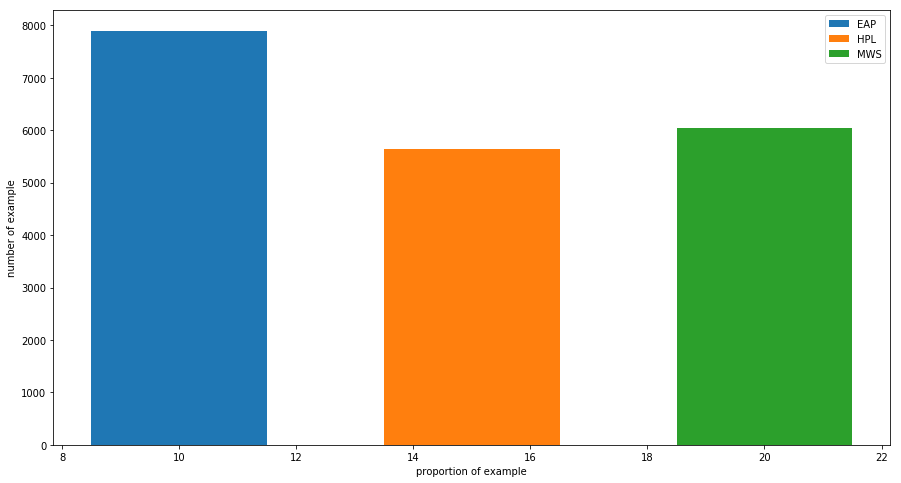

In [24]:
plt.figure(figsize=(15,8))
plt.bar(10,EAP_len, 3, label="EAP")
plt.bar(15,HPL_len, 3, label="HPL")
plt.bar(20,MWS_len, 3, label="MWS")
plt.legend()
plt.ylabel("number of example")
plt.xlabel("proportion of example")
plt.show()


In [25]:
def remove_punctuation(text):
    import string 
    transator=str.maketrans('', '', string.punctuation)
    return text.translate(transator)

In [26]:
train['text']=train['text'].apply(remove_punctuation)
train.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [27]:
sw=stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [29]:
print("NUmber of stopwords: ", len(sw))

NUmber of stopwords:  179


In [32]:
def stopwords(text):
    text=[word.lower() for word in text.split() if word.lower() not in sw ]
    return " ".join(text)

In [33]:
train['text']=train['text'].apply(stopwords)
train.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


In [34]:
count_vectorize=CountVectorizer()
count_vectorize.fit(train['text'])
dictionary=count_vectorize.vocabulary_.items()

In [35]:
vocab=[]
count=[]

for key, val in dictionary:
    vocab.append(key)
    count.append(val)
    
vocab_bef_stem=pd.Series(count, index=vocab)
vocab_bef_stem=vocab_bef_stem.sort_values(ascending=False)

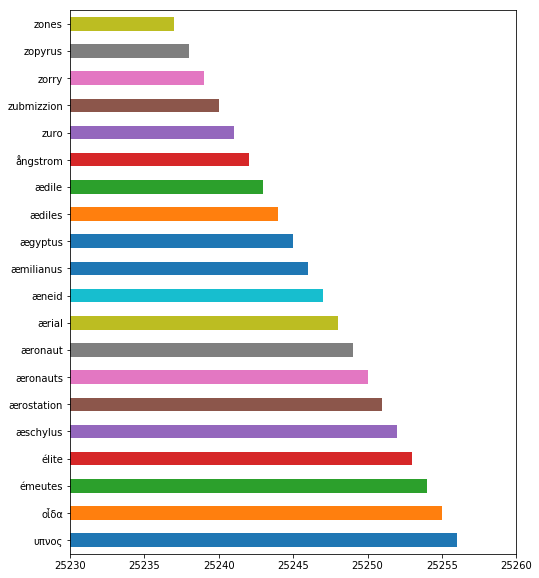

In [37]:
top_vocabs=vocab_bef_stem.head(20)
top_vocabs.plot(kind='barh', figsize=(8,10), xlim=(25230,25260))

In [38]:
stemmer=SnowballStemmer('english')
def stemming(text):
    text=[stemmer.stem(word) for word in text.split()]
    return " , ".join(text)


In [39]:
train['text']=train['text'].apply(stemming)
train.head(10)

,id,text,author
0,id26305,"process , howev , afford , mean , ascertain , ...",EAP
1,id17569,"never , occur , fumbl , might , mere , mistak",HPL
2,id11008,"left , hand , gold , snuff , box , caper , hil...",EAP
3,id27763,"love , spring , look , windsor , terrac , sixt...",MWS
4,id12958,"find , noth , els , even , gold , superintend ...",HPL
5,id22965,"youth , pass , solitud , best , year , spent ,...",MWS
6,id09674,"astronom , perhap , point , took , refug , sug...",EAP
7,id13515,"surcingl , hung , riband , bodi",EAP
8,id19322,"knew , could , say , stereotomi , without , br...",EAP
9,id00912,"confess , neither , structur , languag , code ...",MWS


In [40]:
tfid_vectorize=TfidfVectorizer('english')
tfid_vectorize.fit(train['text'])
dictionary=tfid_vectorize.vocabulary_.items()

In [41]:
vocab=[]
count=[]

for key, val in dictionary:
    vocab.append(key)
    count.append(val)
    
vocab_after_stem=pd.Series(count, index=vocab)

vocab_after_stem=vocab_after_stem.sort_values(ascending=False)



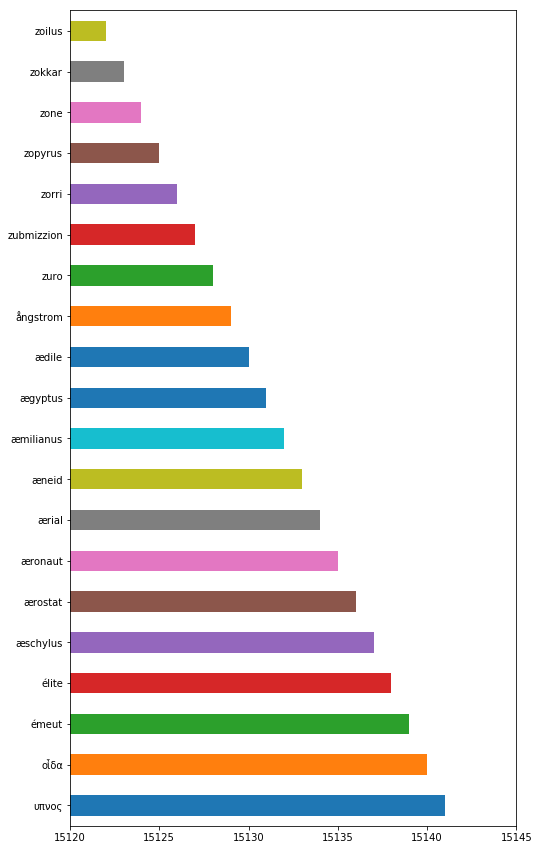

In [42]:
top_vocabs=vocab_after_stem.head(20)
top_vocabs.plot(kind='barh', figsize=(8,15), xlim=(15120, 15145))

In [43]:
def length(text):
    return len(text)

In [44]:
train['text']=train['text'].apply(length)
train.head(10)

,id,text,author
0,id26305,176,EAP
1,id17569,45,HPL
2,id11008,149,EAP
3,id27763,177,MWS
4,id12958,132,HPL
5,id22965,343,MWS
6,id09674,97,EAP
7,id13515,31,EAP
8,id19322,349,EAP
9,id00912,100,MWS


In [49]:
EAP_data=train[train['author']=='EAP']
HPL_data=train[train['author']=='HPL']
MWS_data=train[train['author']=='MWS']

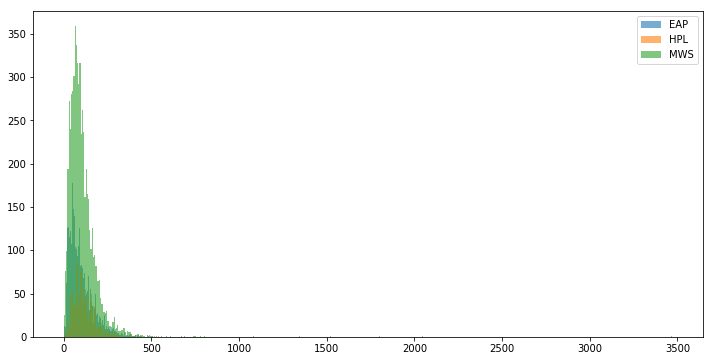

In [54]:
plt.rcParams['figure.figsize']=(12.0, 6.0)
bins=500
plt.hist(EAP_data['text'], alpha=0.6, bins=bins, label='EAP')
plt.hist(HPL_data['text'], alpha=0.6, bins=bins, label='HPL')
plt.hist(MWS_data['text'], alpha=0.6, bins=bins, label='MWS')
plt.legend()
plt.show()